In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Sato et al. 2010 [1]

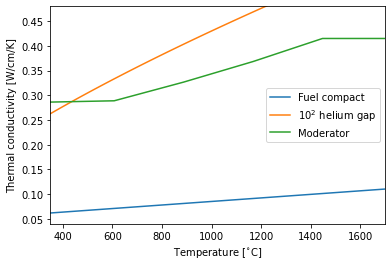

In [6]:
# Material properties
# He 70 bar [4]
file = pd.read_csv('heproperties')
temp = np.array(file['Temperature (K)'].tolist())
rho_c = file['Density (kg/m3)'].tolist()
k_c = file['Therm. Cond. (W/m*K)'].tolist()

# Graphite H-451: Table 3-2 [2]
def k_m(T):  # W/m/K
    if T < 816:  # K
        ret = 28.6
    elif T < 1644.4:  # K
        A1 = 1.24e2
        A2 = -3.32e-1
        A3 = 4.09e-4
        A4 = -2.11e-7
        A5 = 4.02e-11
        ret = A1 + A2*T + A3*T**2 + A4*T**3 + A5*T**4
    else:
        ret = 41.5
    return ret

temp_m = np.linspace(600, 2000, 6)  # K
km = np.array([k_m(T) for T in temp_m])

# Fuel compact: Table 3-3 [2]
def k_f(T):  # W/m/K
    A1 = 3.94
    A2 = 3.59e-3
    A3 = -1.98e-9
    A4 = 3.19e-12
    A5 = -9.77e-16
    return A1 + A2*T + A3*T**2 + A4*T**3 + A5*T**4

temp_f = np.linspace(600, 2200, 4)  # K
kf = np.array([k_f(T) for T in temp_f])

# All the material thermal conductivities
temp -= 273
temp_m -= 273
temp_f -= 273
plt.plot(temp_f, kf/100, label='Fuel compact')
plt.plot(temp, k_c, label=r'10$^2$ helium gap')
plt.plot(temp_m, km/100, label='Moderator')
plt.legend(loc='best')
plt.xlim([350, 1700])
plt.ylim(top=0.48)
plt.ylabel('Thermal conductivity [W/cm/K]')
plt.xlabel(r'Temperature [$^{\circ}$C]')
plt.savefig("val-assem-matprop", dpi=300, bbox_inches="tight")

In [18]:
# film properties
file = pd.read_csv('heproperties')
temp = file['Temperature (K)'].tolist()
rho_c = np.array(file['Density (kg/m3)'].tolist())
k_c = np.array(file['Therm. Cond. (W/m*K)'].tolist())
m_c = np.array(file['Viscosity (Pa*s)'].tolist())
cp_c = np.array(file['Cp (J/g*K)'].tolist())*1e3

rho = 4.36992  # kg/m3
v = 26.20  # m/s
D = 1.588/100  # m
Re = rho*v*D/m_c
# print('Re: ', Re)
Pr = m_c*cp_c/k_c
# print('Pr: ', Pr)
Nu = 0.023*(Re**0.8)*(Pr**0.4)
# print('Nu: ', Nu)
h = Nu/D * k_c  # W/m^2/K
# print('h: ', h)
h /= 1e4 # W/cm^2/K
R = D/2 * 100 # cm
dx = 0.01
kg = h * R * np.log(1 + dx/R)
# print('kgap: ', kg)

temp1 = np.array([600, 800, 1000, 1200, 1400])
kgc = np.array([np.interp(t, temp, kg) for t in temp1])
print(temp1-273)
print(kgc)
print(np.average(kgc))

[ 327  527  727  927 1127]
[0.00196382 0.00204042 0.00210192 0.00215352 0.00219818]
0.0020915726255304307


In [20]:
# Still film properties
# Will see if the k coolant gap changes a lot
# when imposing diff velocities to the diff channels

rlc = 1.588/2  # cm
rsc = 1.27/2  # cm
rho = 4.36992  # [kg/m3] 70 bar, 490 C
rho /= 1e6  # [kg/cm3]

# film properties
file = pd.read_csv('heproperties')
temp = file['Temperature (K)'].tolist()
rho_c = np.array(file['Density (kg/m3)'].tolist())
k_c = np.array(file['Therm. Cond. (W/m*K)'].tolist())
m_c = np.array(file['Viscosity (Pa*s)'].tolist())
cp_c = np.array(file['Cp (J/g*K)'].tolist())*1e3

m = np.array([12.36, 22.67, 22.74, 22.76, 22.86, 22.66, 22.70, 22.73, 22.73, 22.76, 22.77, 22.91, 22.87])
m /= 1e3
rl = rlc * np.ones(len(m))
rl[0] = rsc
vl = m/np.pi/rl**2/rho
# print(vl)

for v in vl:
    rho = 4.36992  # kg/m3
    v = v/100
    D = 1.588/100  # m
    Re = rho*v*D/m_c
    # print('Re: ', Re)
    Pr = m_c*cp_c/k_c
    # print('Pr: ', Pr)
    Nu = 0.023*(Re**0.8)*(Pr**0.4)
    # print('Nu: ', Nu)
    h = Nu/D * k_c  # W/m^2/K
    # print('h: ', h)
    h /= 1e4 # W/cm^2/K
    R = D/2 * 100 # cm
    dx = 0.01
    kg = h * R * np.log(1 + dx/R)
    # print('kgap: ', kg)

    temp1 = np.array([600, 800, 1000, 1200, 1400])
    kgc = np.array([np.interp(t, temp, kg) for t in temp1])
    print(np.average(kgc))

# It barely changes, so the conclusion here is that
# The coolant film for all the channels can be defined as
# one material
# mmm- it affects a bit more the smaller channel... well, ideally, the mesh should differentiate the diff channel films

0.0018403907633498008
0.0020911329295914423
0.0020962969053153245
0.002097771742676287
0.00210514204730296
0.002090394958638404
0.0020933464519724567
0.0020955593893586056
0.0020955593893586056
0.002097771742676287
0.0020985090641489177
0.002108824780474244
0.002105878722709771


In [22]:
# flow distribution - no gap
# uses data from Fig 9 [1]
rlc = 1.588/2  # cm
rsc = 1.27/2   # cm
rho = 4.36992  # [kg/m3] 70 bar, 490 C
rho /= 1e6     # [kg/cm3]

m = np.array([12.36, 22.67, 22.74, 22.76, 22.86, 22.66, 22.70, 22.73, 22.73, 22.76, 22.77, 22.91, 22.87])
m /= 1e3
rl = rlc * np.ones(len(m))
rl[0] = rsc
v = m/np.pi/rl**2/rho
print(v)
Mt = m[0]/2 + m[1]/2 + m[2]/2 + m[3]/2 + m[4]/2 + m[5]/2 + m[9]/2 + m[12]/2 + m[6] + m[7] + m[8] + m[10] + m[11]
print('Total mass flow: ', Mt)  # sanity check

m2 = [m[0]/2, m[1]/2, m[2]/2, m[3]/2, m[4]/2, m[5]/2, m[6], m[7], m[8], m[9]/2, m[10], m[11], m[12]/2]
m2 = np.array(m2)*1000
print('Real mass flow for each channel: ', m2)

[2232.7888825  2619.31153892 2627.39939986 2629.71021728 2641.26430435
 2618.15613021 2622.77776504 2626.24399116 2626.24399116 2629.71021728
 2630.86562599 2647.04134789 2642.41971306]
Total mass flow:  0.19967999999999997
Real mass flow for each channel:  [ 6.18  11.335 11.37  11.38  11.43  11.33  22.7   22.73  22.73  11.38
 22.77  22.91  11.435]


In [23]:
# analytical solution for the coolant temperature - sanity check
# uses data from Fig 9 [1]

Ti = 490  # [C]
rf = 0.6225
rlc = 1.588/2  # cm
rsc = 1.27/2  # cm
L = 793
rho = 4.36992  # [kg/m3] 70 bar, 490 C
rho /= 1e6  # [kg/cm3]
cp = 5.188e3  # J/kg/K

q = 27.88  # W/cm3
Q = q * L * np.pi * rf**2 * 17.5
print(Q)

ri = rlc * np.ones(len(m))
ri[0] = rsc
Ai = np.pi * ri**2
Ai[0] *= 0.5 
Ai[1] *= 0.5
Ai[2] *= 0.5
Ai[3] *= 0.5
Ai[4] *= 0.5
Ai[5] *= 0.5
Ai[9] *= 0.5
Ai[12] *= 0.5
print(Ai)

vi = [2232, 2619, 2627, 2630, 2641, 2618, 2622, 2626, 2626, 2629, 2630, 2647, 2642]
dTi = [983.5, 956.3, 948.6, 945.3, 934.6, 958.7, 950.4, 946.3, 945.3, 946, 941.1, 927.1, 931.6]
vi = np.array(vi)
dTi = np.array(dTi)
dTi -= 490 
rho*cp*sum(vi*dTi*Ai)

471012.67008027283
[0.63338435 0.99028655 0.99028655 0.99028655 0.99028655 0.99028655
 1.98057311 1.98057311 1.98057311 0.99028655 1.98057311 1.98057311
 0.99028655]


471100.49330171006

In [3]:
# flow distribution - 1.5 mm gap
# uses data from Fig 9 [1]
rlc = 1.588/2  # cm
rsc = 1.27/2  # cm
rho = 4.36992  # [kg/m3] 70 bar, 490 C
rho /= 1e6  # [kg/cm3]
bg = 0.3  # cm - total width between channels
f = 18 * np.tan(np.pi/6)

mi = np.array([11.76, 21.60, 21.70, 21.82, 22.16, 21.59, 21.58, 21.67, 21.83, 21.76, 21.81, 22.20, 22.20, 16.56])
mi /= 1e3
ri = rlc * np.ones(len(mi))
ri[0] = rsc
Ai = np.pi * ri**2
Ai[-1] = f * bg + 0.25 * bg * bg * np.tan(np.pi/6) # Area of the total width between channels
print(Ai)
vi = mi/rho/Ai
print(vi)
Mt = mi[0]/2 + mi[1]/2 + mi[2]/2 + mi[3]/2 + mi[4]/2 + mi[5]/2 + mi[9]/2 + mi[12]/2 + mi[6] + mi[7] + mi[8] + mi[10] + mi[11] + mi[13]/2
print(Mt)

m = mi
m2 = [m[0]/2, m[1]/2, m[2]/2, m[3]/2, m[4]/2, m[5]/2, m[6], m[7], m[8], m[9]/2, m[10], m[11], m[12]/2, m[13]/2]
m2 = np.array(m2)*1000
print('Real mass flow for each channel: ', m2)

[1.2667687  1.98057311 1.98057311 1.98057311 1.98057311 1.98057311
 1.98057311 1.98057311 1.98057311 1.98057311 1.98057311 1.98057311
 1.98057311 3.13068183]
[2124.40107267 2495.68280726 2507.23689433 2521.10179882 2560.38569486
 2494.52739855 2493.37198985 2503.77066821 2522.25720752 2514.16934657
 2519.94639011 2565.00732968 2565.00732968 1210.45294863]
0.199665
Real mass flow for each channel:  [ 5.88  10.8   10.85  10.91  11.08  10.795 21.58  21.67  21.83  10.88
 21.81  22.2   11.1    8.28 ]


In [7]:
# gap film properties
file = pd.read_csv('heproperties')
temp = file['Temperature (K)'].tolist()
rho_c = np.array(file['Density (kg/m3)'].tolist())
k_c = np.array(file['Therm. Cond. (W/m*K)'].tolist())
m_c = np.array(file['Viscosity (Pa*s)'].tolist())
cp_c = np.array(file['Cp (J/g*K)'].tolist())*1e3

rho = 4.36992  # kg/m3
v = 12.10  # m/s
bg = 0.3
f = 18 * np.tan(np.pi/6)

Ah = f * bg + 0.25 * bg * bg * np.tan(np.pi/6)
Ph = 2 * f + bg/np.cos(np.pi/6)

Dh = 4 * Ah/Ph
Dh /= 100
Re = rho*v*Dh/m_c
# print('Re: ', Re)
Pr = m_c*cp_c/k_c
# print('Pr: ', Pr)
Nu = 0.023*(Re**0.8)*(Pr**0.4)
# print('Nu: ', Nu)
h = Nu/Dh * k_c  # W/m^2/K
# print('h: ', h)
h /= 1e4 # W/cm^2/K
dx = 0.01
kg = h * dx
# print('kgap: ', kg)

temp1 = np.array([600, 800, 1000, 1200, 1400])
kgc = np.array([np.interp(t, temp, kg) for t in temp1])
print(temp1-273)
print(kgc)
print(np.average(kgc))

[ 327  527  727  927 1127]
[0.00129725 0.00134785 0.00138847 0.00142257 0.00145206]
0.0013816410446038433


## References:

[1]: Sato et al. Computational fluid dynamic analysis of core bypass flow phenomena in a prismatic VHTR. 2010

[2]: Johnson et al. CFD Analysis of Core Bypass Phenomena. 2009

[3]: MacDonald et al. NGNP Preliminary Point Design – Results of the Initial Neutronics and Thermal-Hydraulic Assessments. 2003

[4]: NIST

[5]: General Atomic. SAFETY ANALYSIS REPORT USE OF H-451 GRAPHITE IN FORT ST. VRAIN FUEL ELEMENTS. 1977
